# Group Project III — Model Training & Explanations

In this Assignment, we continue with the Group Project by training a ML Model and corresponding explanations.

**✏️ Task 1 - Scenario Walkthough with Paper Prototypes**

In the exercise you created a scenario walkthrough with paper prototypes for your primary stakeholder.

Some example questions that you want to answer with such a prototype could be:
- How is the first contact of the Stakeholder with the interface?
- How is the decision support presented to the user?
- Which information need to be presented?
- How can uncertainty be communicated?
- Which explanations are shown to the stakeholder?
- What level of detail is appropriate?

Document the scenario walkthrough digitally in the README of your repository, either by taking a photograph of your created scenario walkthrough or by translating the interface ideas with tools like Excalidraw or Figma and exporting a PNG file.

**✏️ Task 2** — **Descriptive Data Analysis**  
Start with a descriptive data analysis of your dataset. Generate informative plots about the features and your target variable. Describe any information you find important or interesting for further analysis.

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

In [22]:

df = pd.read_csv("ObesityData.csv")
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


#### **Understanding the Dataset**

In [ ]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


: 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

: 

#### **Target Variable Distribution**

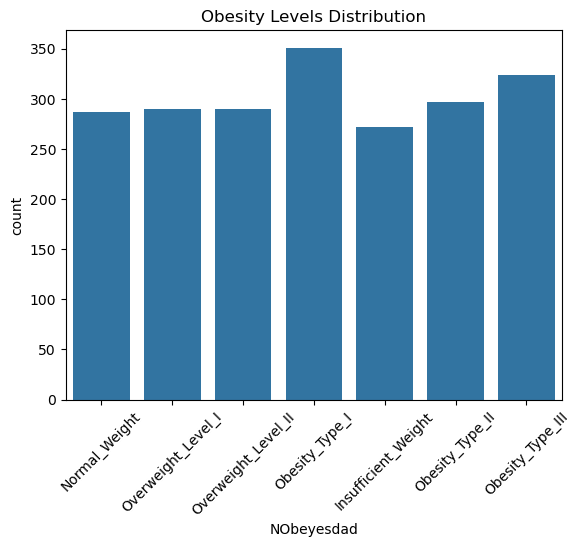

: 

In [ ]:
sns.countplot(data=df, x='NObeyesdad')
plt.xticks(rotation=45)
plt.title("Obesity Levels Distribution")
plt.show()

#### **Numerical Feature Desitributions**

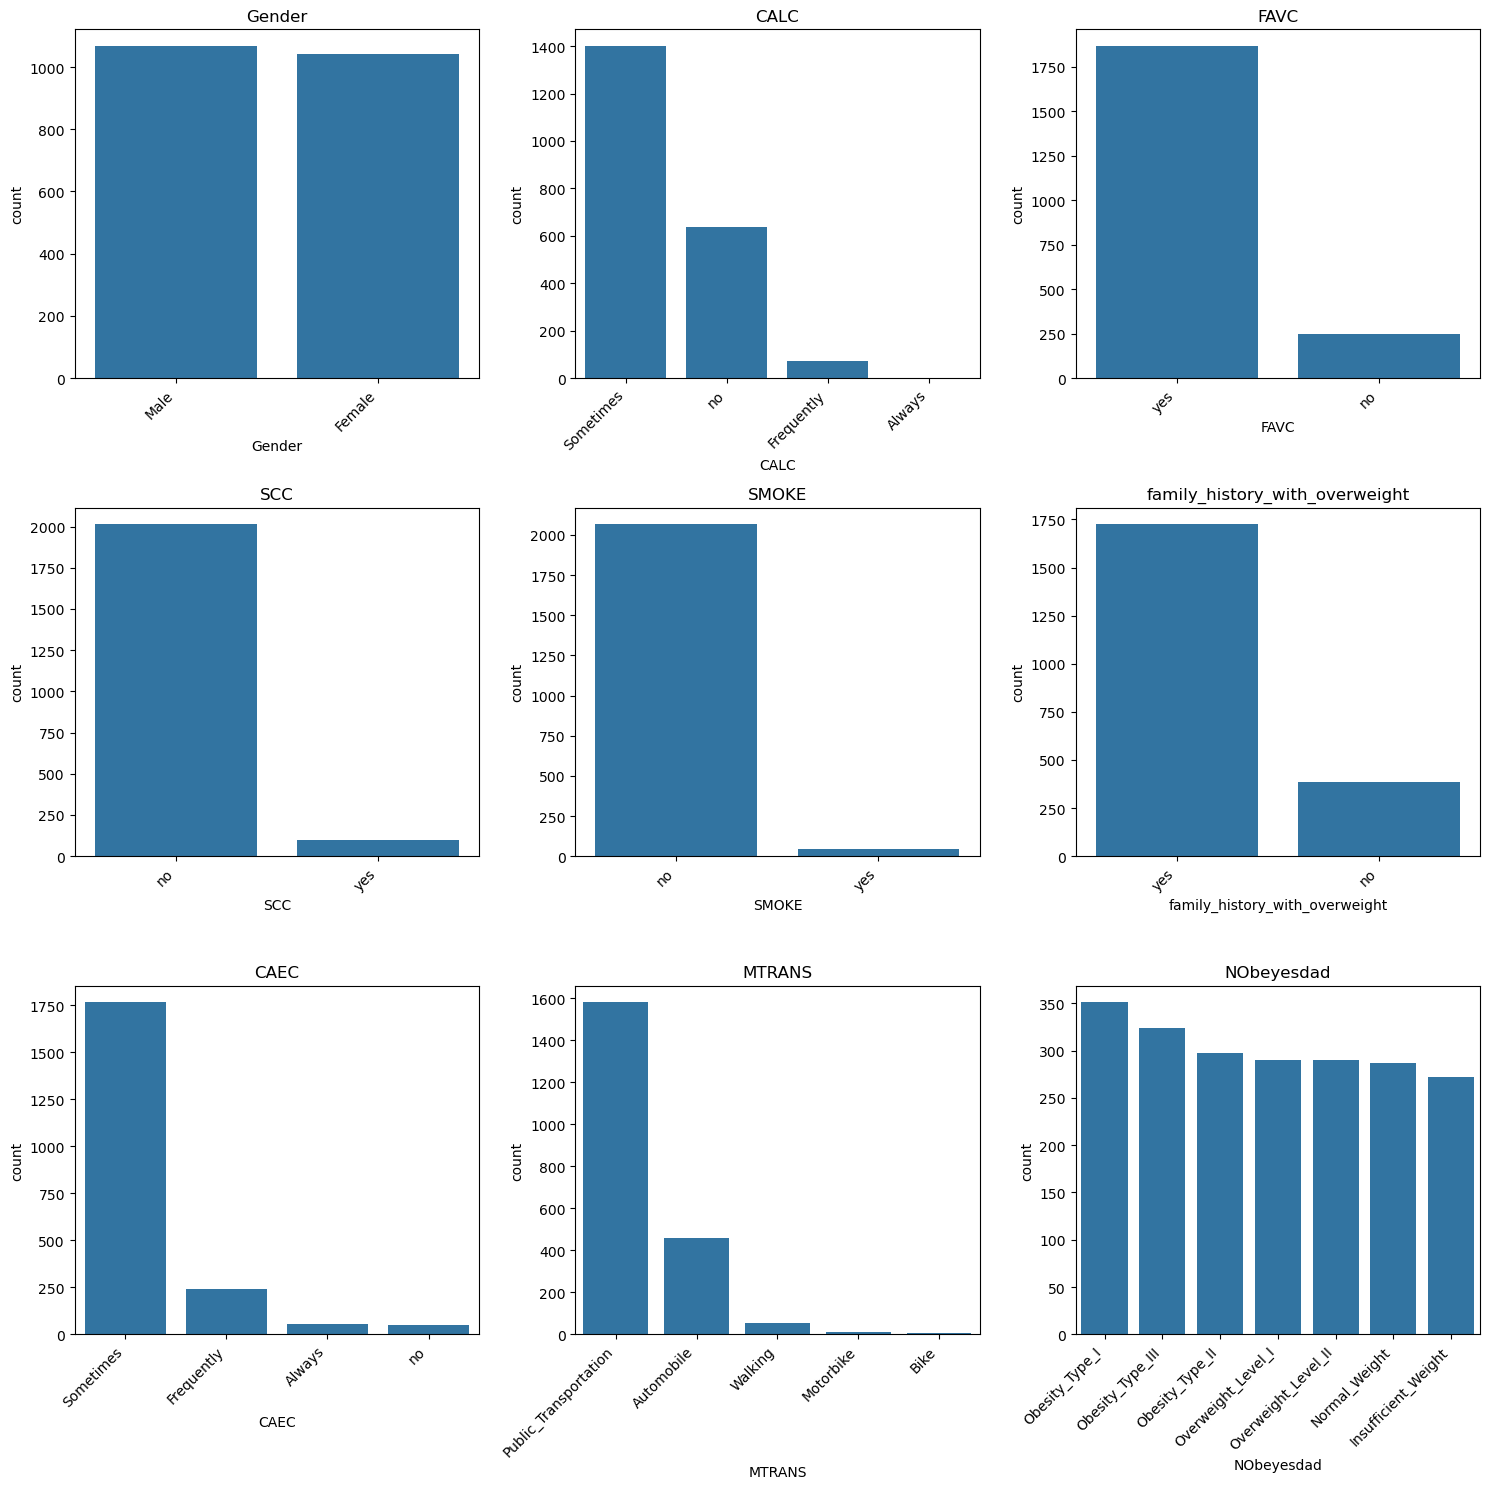

: 

In [ ]:
numerical_cols = df.select_dtypes(include=['object']).columns

n = len(numerical_cols)
rows = math.ceil(n / 3)
plt.figure(figsize=(15, 5 * rows))

for i, column in enumerate(numerical_cols):
    plt.subplot(rows, 3, i + 1)
    sns.countplot(data=df, x=column, order=df[column].value_counts().index)
    plt.title(column)
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

#### **Categorical Fetaure Distributions**

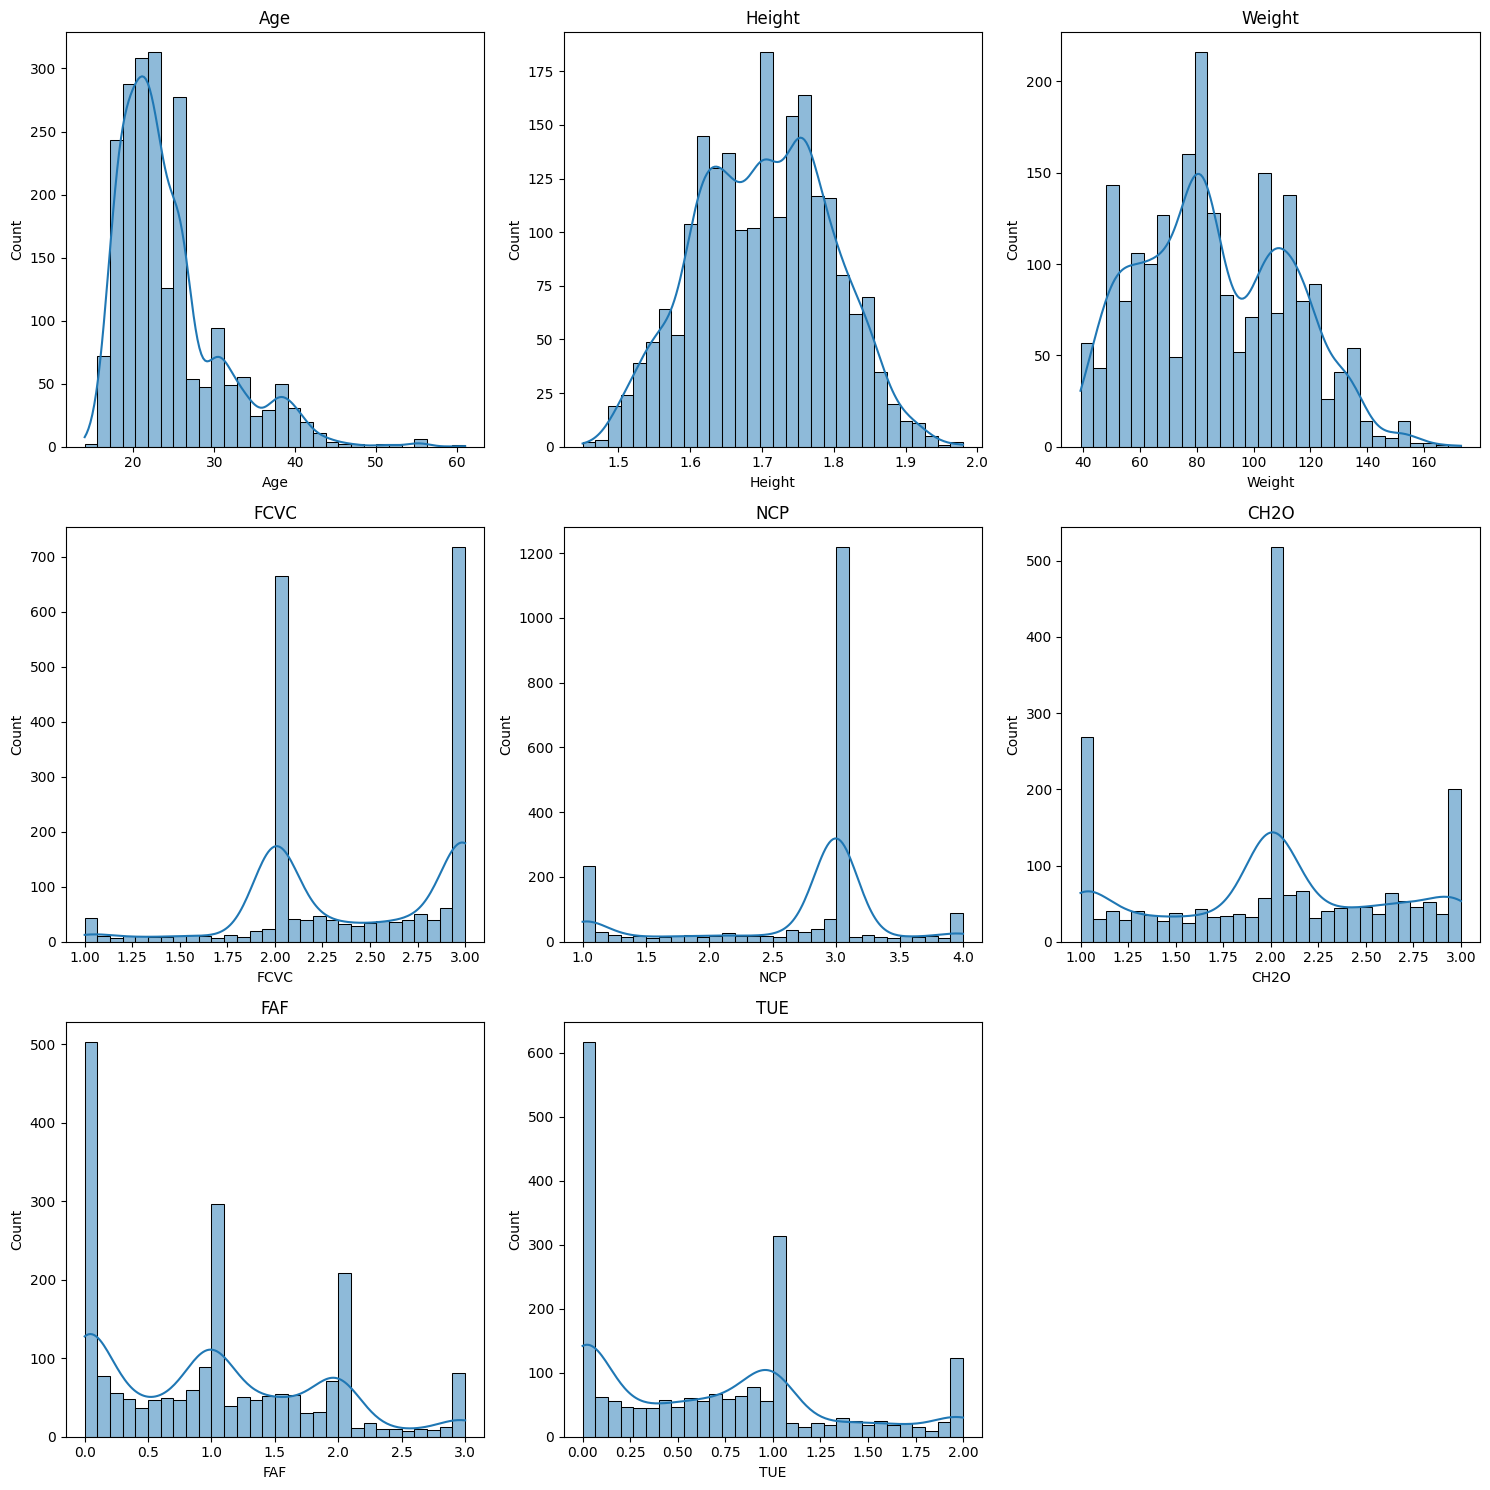

: 

: 

: 

: 

: 

In [ ]:
categorical_cols = df.select_dtypes(include=['float64', 'int64']).columns

n = len(categorical_cols)
rows = math.ceil(n / 3)
plt.figure(figsize=(15, 5 * rows))

for i, column in enumerate(categorical_cols):
    plt.subplot(rows, 3, i + 1)
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(column)

plt.tight_layout()
plt.show()

#### **Obesity levels by Numerical Features**

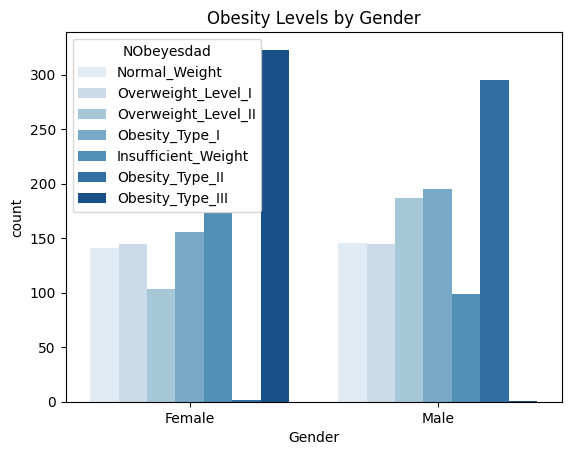

: 

: 

: 

: 

: 

In [ ]:
sns.countplot(data=df, x='Gender', hue='NObeyesdad', palette='Blues')
plt.title("Obesity Levels by Gender")
plt.show()

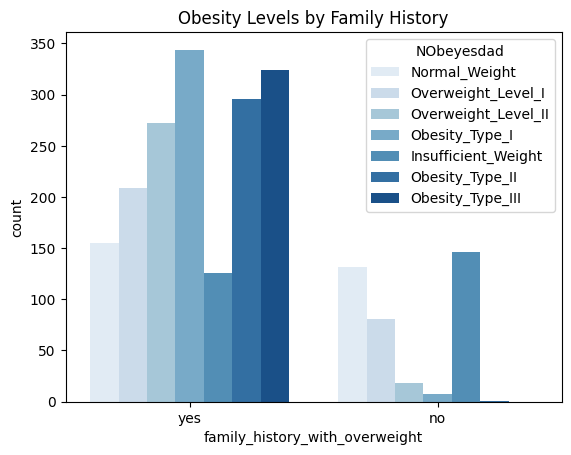

: 

: 

: 

: 

: 

In [ ]:
sns.countplot(data=df, x='family_history_with_overweight', hue='NObeyesdad', palette='Blues')
plt.title("Obesity Levels by Family History")
plt.show()

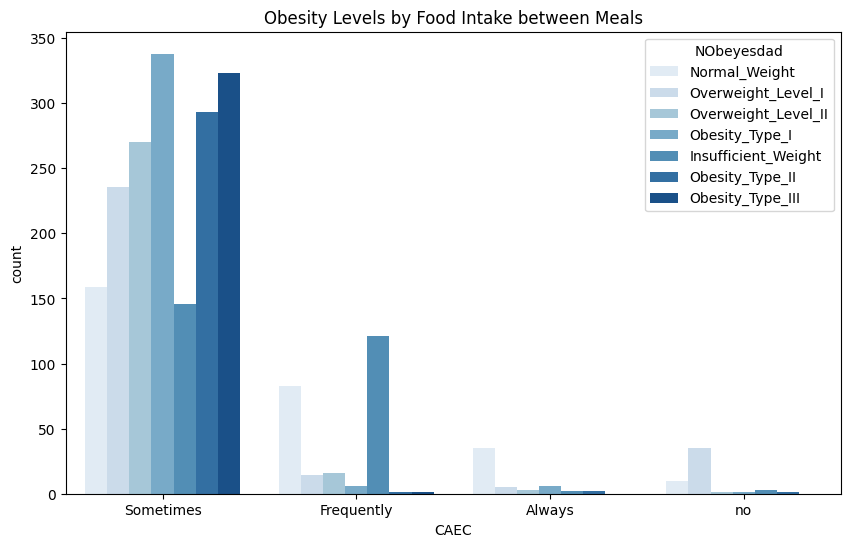

: 

: 

: 

: 

: 

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=df, x='CAEC', hue='NObeyesdad', palette='Blues')
plt.title("Obesity Levels by Food Intake between Meals")
plt.show()

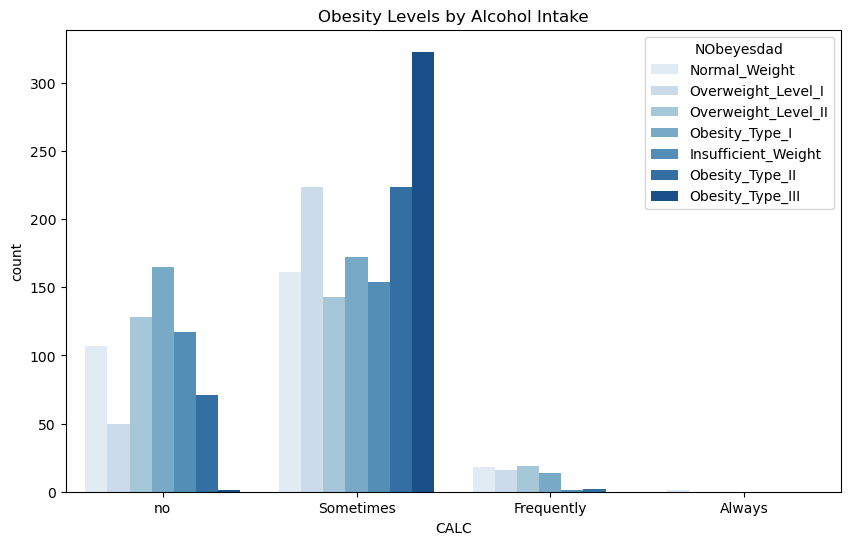

: 

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=df, x='CALC', hue='NObeyesdad', palette='Blues')
plt.title("Obesity Levels by Alcohol Intake")
plt.show()

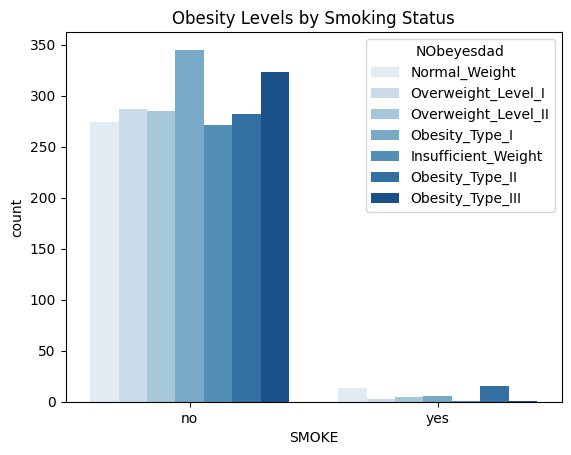

: 

: 

: 

: 

: 

In [ ]:
sns.countplot(data=df, x='SMOKE', hue='NObeyesdad', palette='Blues')
plt.title("Obesity Levels by Smoking Status")
plt.show()

C:\Users\ayaan\AppData\Local\Temp\ipykernel_12620\1459827194.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


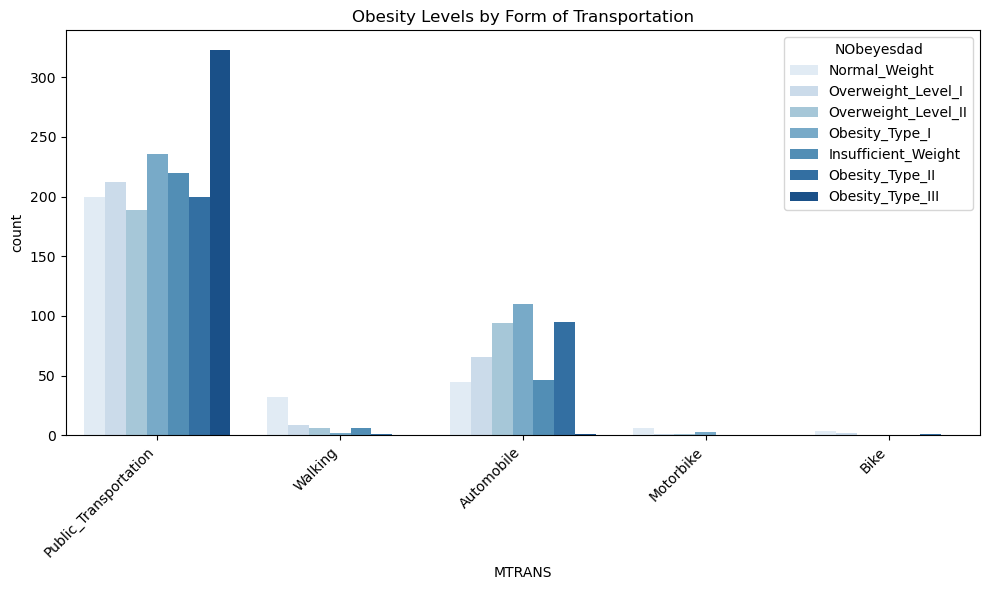

: 

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))  # create fig and ax
sns.countplot(data=df, x='MTRANS', hue='NObeyesdad', palette='Blues', ax=ax)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

ax.set_title("Obesity Levels by Form of Transportation")

plt.tight_layout()
plt.show()

#### **Correlation Heatmap**

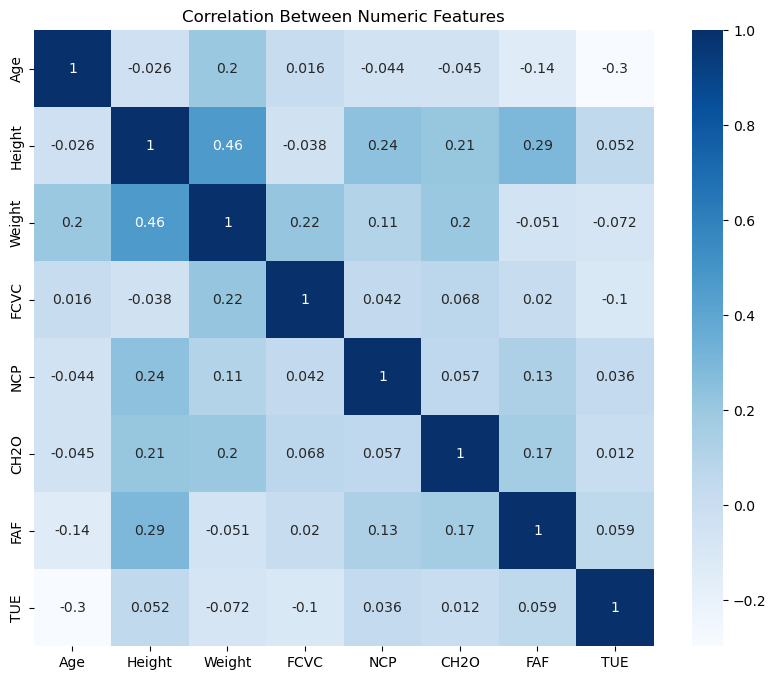

: 

In [ ]:
plt.figure(figsize=(10, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title("Correlation Between Numeric Features")
plt.show()

Scattter Plot Showing Obesity Levels

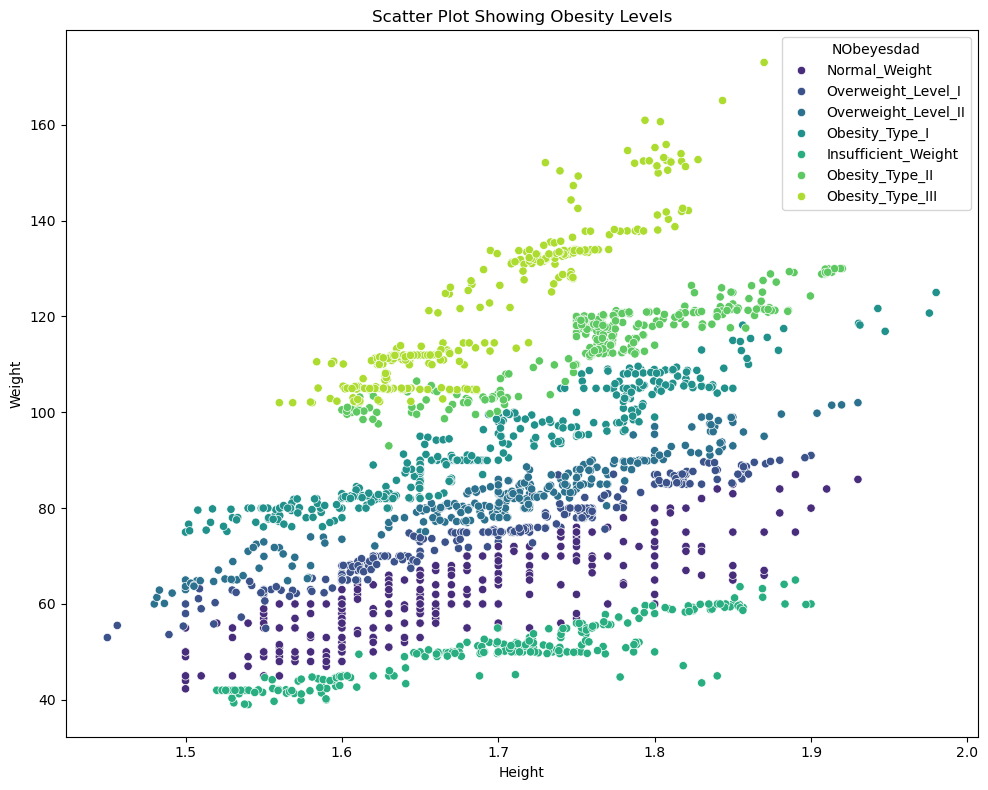

: 

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Height', y='Weight', hue='NObeyesdad', data=df, palette='viridis')
plt.title('Scatter Plot Showing Obesity Levels')
plt.tight_layout()
plt.show()

#### **Observations**

**Activity and Lifestyle**
*   Individuals with a family history of overweight tend to be more represented in higher obesity categories.
*   The most common mode of transportation is public transportation, followed by automobiles.
*   Smoking is rare among the group, indicating overall low engagement in harmful lifestyle habits.
*   Time spent on technology devices (TUE) varies, but a significant portion of individuals spends minimal to moderate time on such devices.

**Dietary Habits**
*  Most individuals eat 3 meals a day.
*  Regular consumption of vegetables (FCVC) is observed.
*  Calorie monitoring (SCC) is rare, indicating a lack of attention to daily energy intake.

**Genetic Factors**
*  A majority of individuals have a family history of overweight.

In summary, the exploratory analysis reveals significant relationships between lifestyle factors and obesity levels. Notably, features such as weight, eating habits (CAEC), Family History, and Smoking.

In [23]:
binary_cols = ['FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight',]

# Map binary columns to booleans
for col in binary_cols:
    unique_vals = sorted(df[col].unique())
    # Map the first unique value to False, the second to True
    mapping = {unique_vals[0]: False, unique_vals[1]: True}
    df[col] = df[col].map(mapping)

df[binary_cols].head()

,FAVC,SCC,SMOKE,family_history_with_overweight
0,False,False,False,True
1,False,True,True,True
2,False,False,False,True
3,False,False,False,False
4,False,False,False,False


**✏️ Task 3** — **Train a ML Model**  
Chose a ML Model suitable for your dataset, that you want to use in your explanation interface to guide the decision of your Stakeholder. If you did not choose a ML model yet, think about which model is suitable to predict your target variable. Train and evaluate the model appropriately. Generate reasonable metrics and/or plots to summarize the model's performance.



In [25]:
# One-hot encode all object columns
X = pd.get_dummies(df.drop('NObeyesdad', axis=1), drop_first=True)
y = df['NObeyesdad']

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Fit model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42, max_features=None)
model.fit(X_train, y_train)



# Evaluate
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))



                     precision    recall  f1-score   support

Insufficient_Weight       0.96      0.89      0.92        54
      Normal_Weight       0.87      0.91      0.89        58
     Obesity_Type_I       0.91      1.00      0.95        70
    Obesity_Type_II       1.00      0.97      0.98        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.95      0.95      0.95        58
Overweight_Level_II       0.98      0.93      0.96        58

           accuracy                           0.95       423
          macro avg       0.95      0.95      0.95       423
       weighted avg       0.95      0.95      0.95       423



<Figure size 1000x800 with 0 Axes>

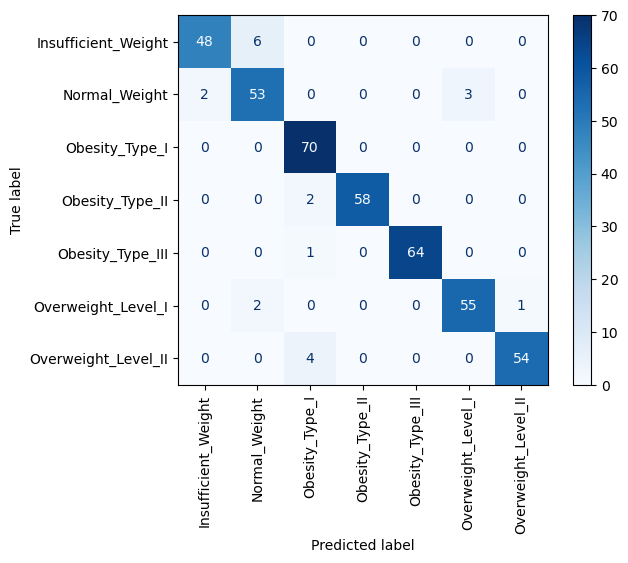

<Figure size 1000x800 with 0 Axes>

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Compute the confusion matrix display
disp = ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred,
    cmap='Blues',
    xticks_rotation='vertical'
)

plt.figure(figsize=(10, 8))



**✏️ Task 4** — **Generate Explanations**  
Your trained ML model is aimed to be used as guidance in your explanation interface to support your primary Stakeholder in a decision-making scenario. Think about reasonable explanations your stakeholder might need to understand the model output in order to guide the decision appropriately. Generate these explanations, e.g. in the form of appropriate visualizations.



Shape of SHAP-values: (423, 23, 7)
feature_names ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'Gender_Male', 'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'FAVC_yes', 'SCC_yes', 'SMOKE_yes', 'family_history_with_overweight_yes', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking']


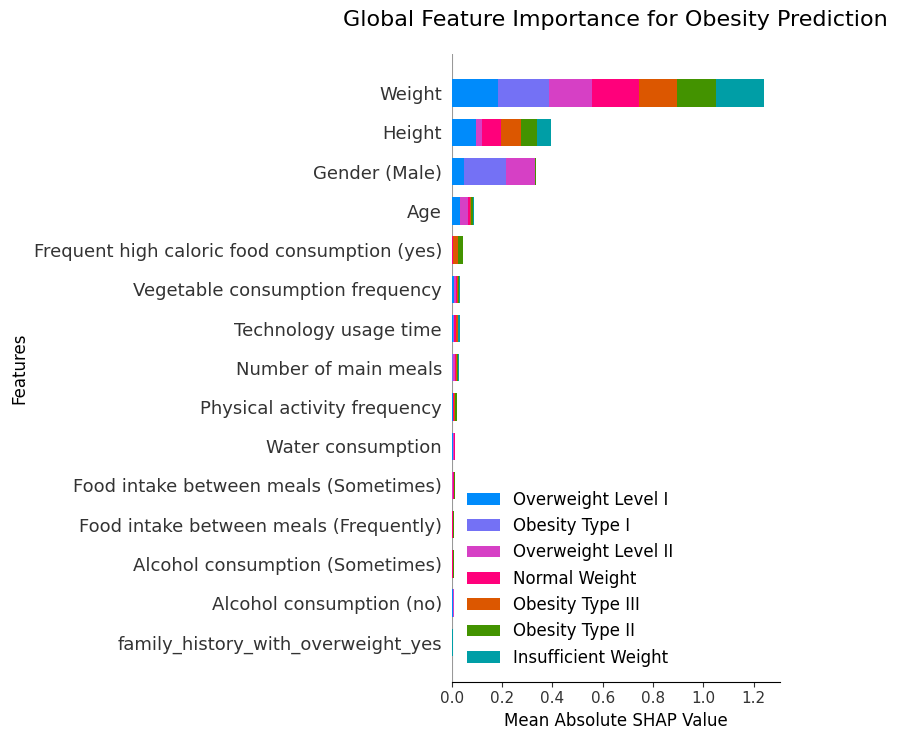

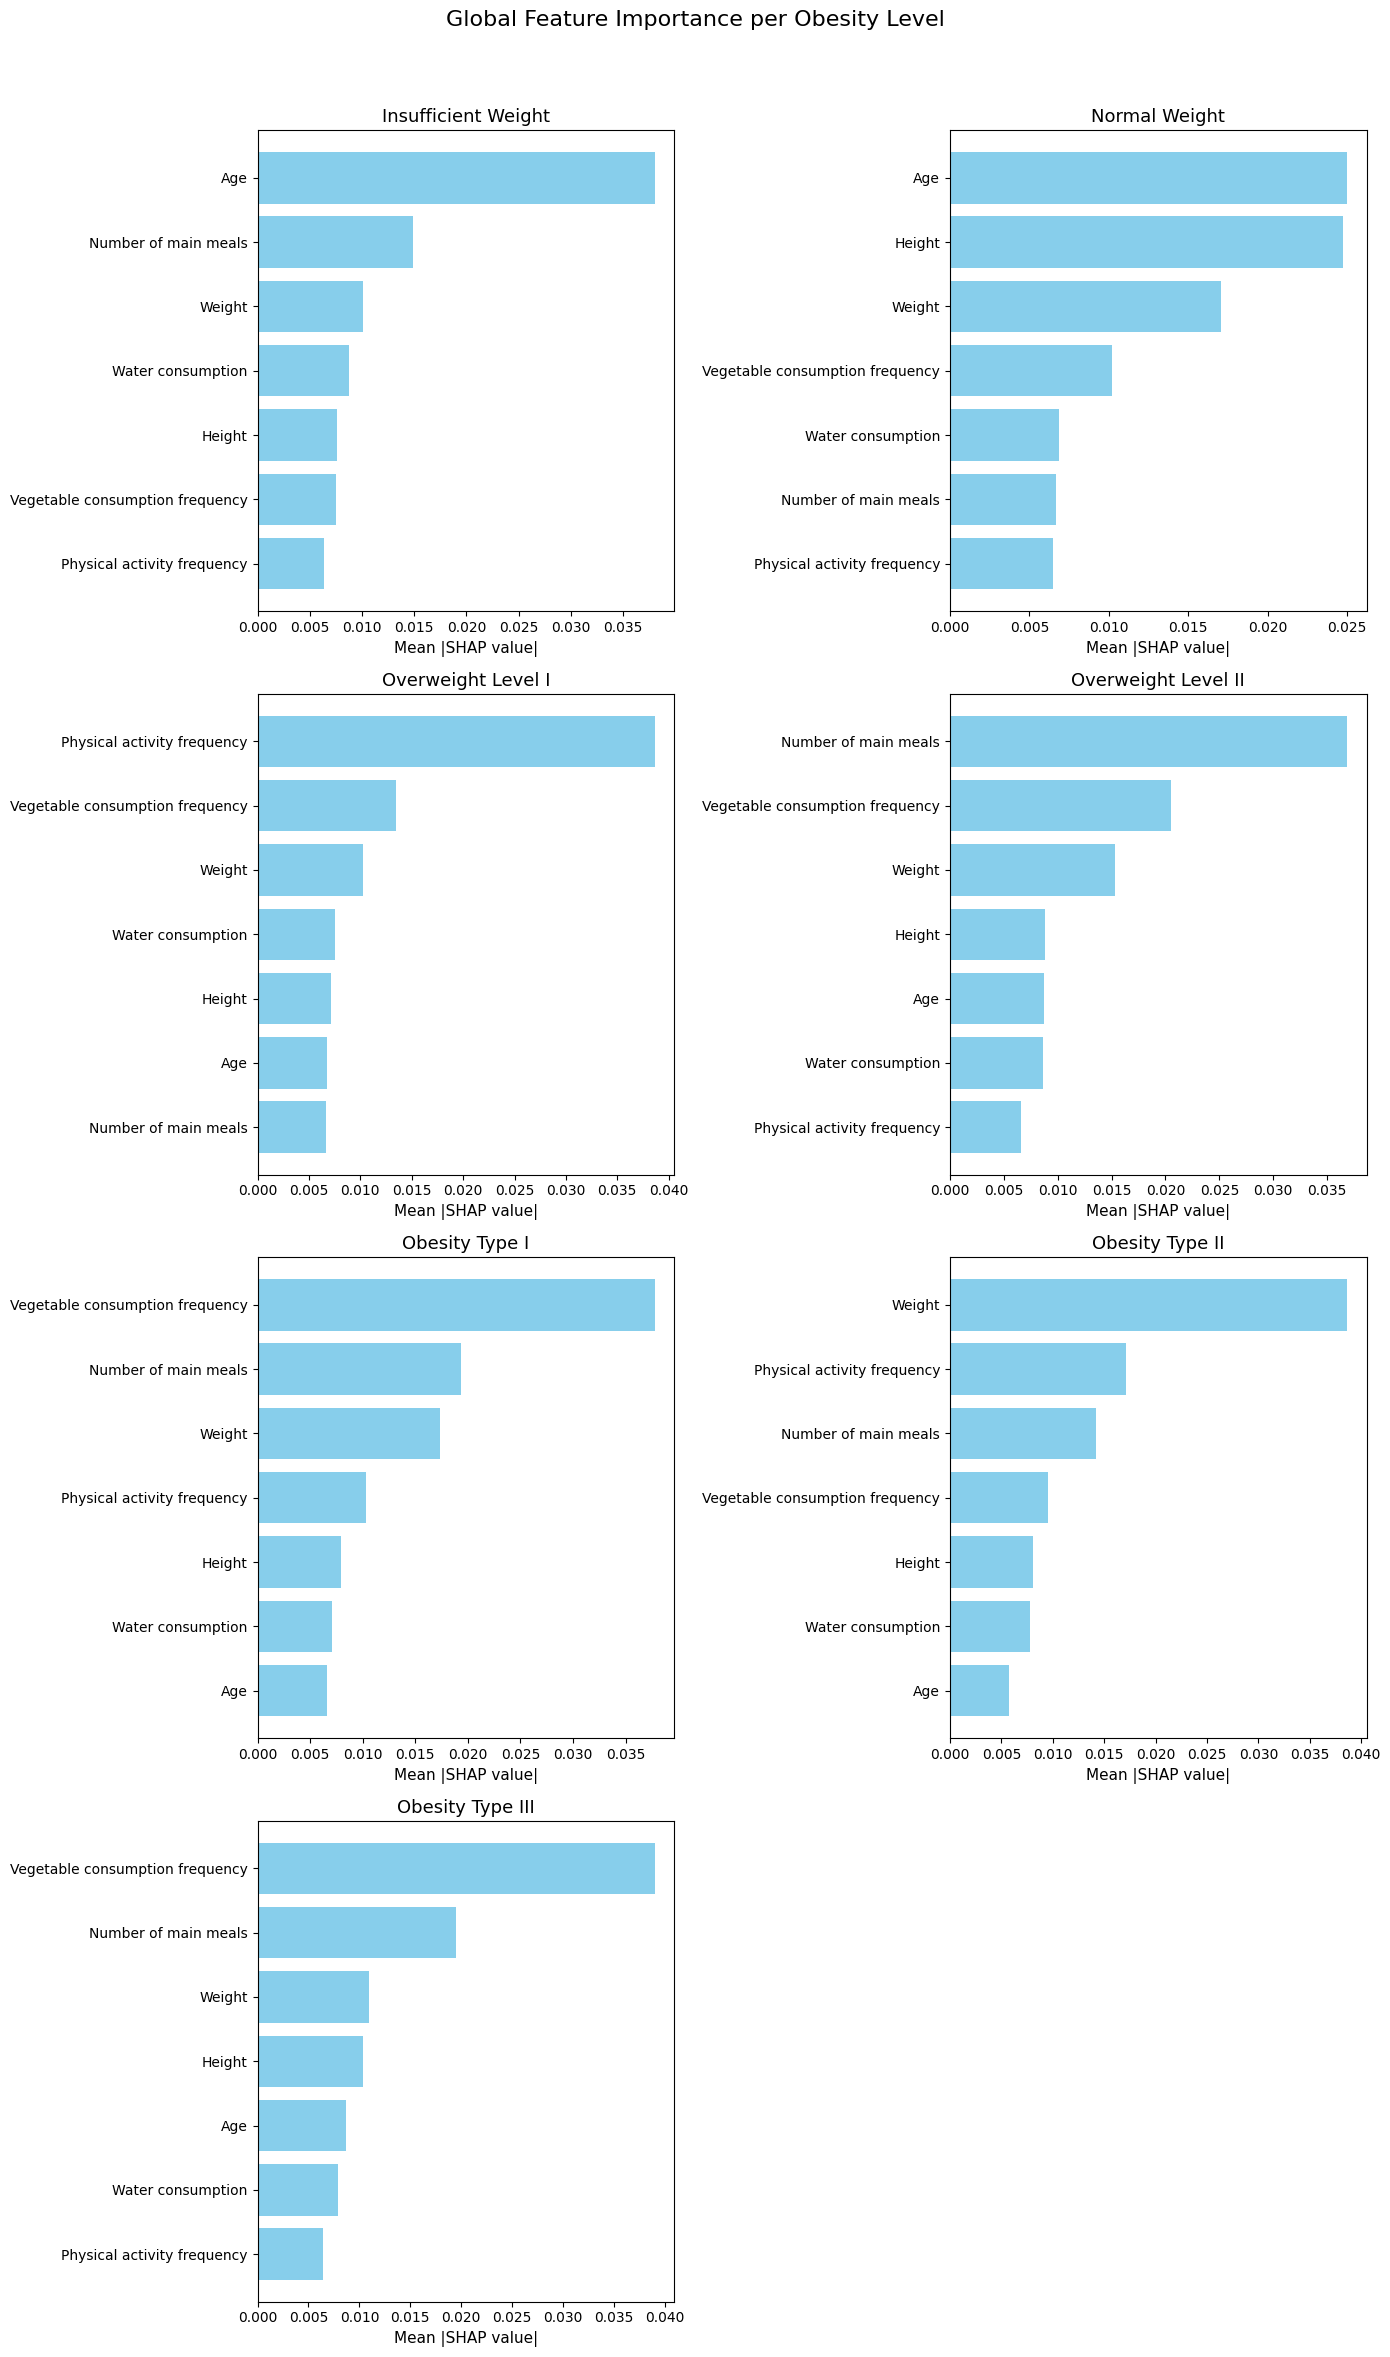

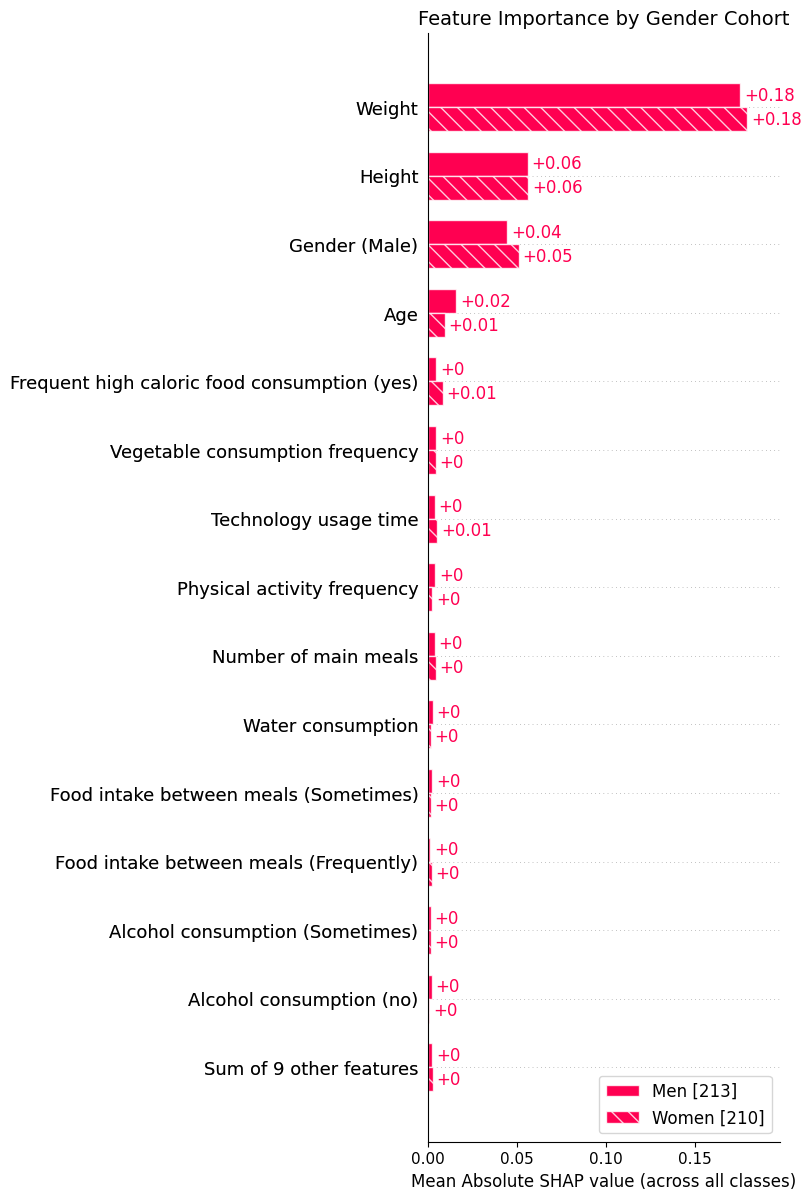

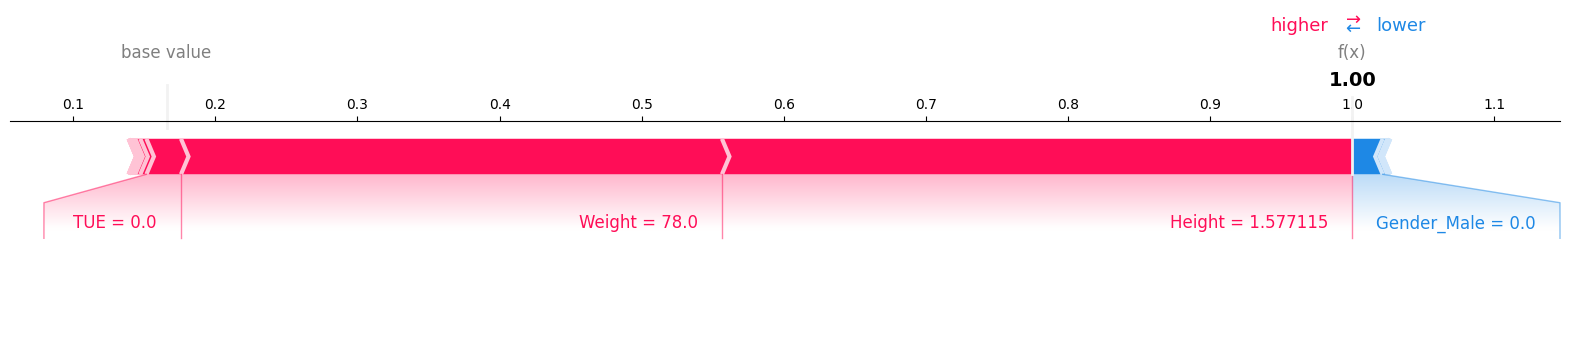

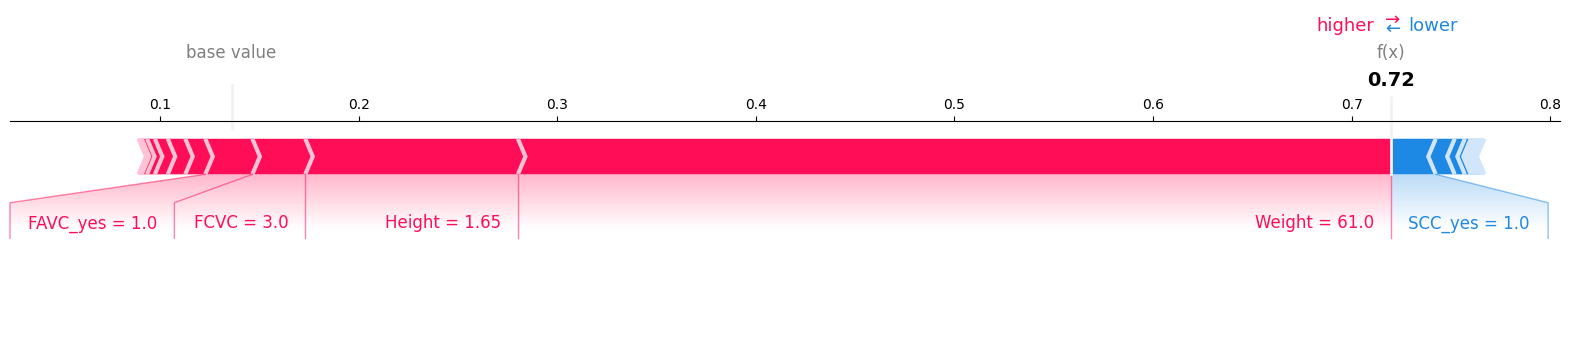

: 

: 

: 

In [ ]:
import shap

# Get feature names
X = df.drop("NObeyesdad", axis=1)
X_encoded = pd.get_dummies(X, drop_first=True)
feature_names = X_encoded.columns.tolist()

# Calculate SHAP values
explainer = shap.TreeExplainer(model)

shap_values = explainer.shap_values(X_test)
print(f"Shape of SHAP-values: {np.array(shap_values).shape}")

class_names = ['Insufficient Weight', 'Normal Weight', 'Overweight Level I', 'Overweight Level II', 'Obesity Type I', 'Obesity Type II', 'Obesity Type III']
attribute_descriptions = {
    'Gender': 'Gender',
    'Age': 'Age',
    'Height': 'Height',
    'Weight': 'Weight',
    'family_history_with_overweight': 'Family history of overweight',
    'FAVC': 'Frequent high caloric food consumption',
    'FCVC': 'Vegetable consumption frequency',
    'NCP': 'Number of main meals',
    'CAEC': 'Food intake between meals',
    'SMOKE': 'Smoking status',
    'CH2O': 'Water consumption',
    'SCC': 'Calorie intake monitoring',
    'FAF': 'Physical activity frequency',
    'TUE': 'Technology usage time',
    'CALC': 'Alcohol consumption',
    'MTRANS': 'Transportation used'
}

# Create feature names with descriptions
feature_descriptions = []
print("feature_names", feature_names)
for feature in feature_names:
    # Handle one-hot encoded features (e.g., 'Gender_Male')
    if '_' in feature:
        base_feature, category = feature.split('_', 1)
        if base_feature in attribute_descriptions:
            desc = f"{attribute_descriptions[base_feature]} ({category.replace('_', ' ')})"
        else:
            desc = feature
    else:
        desc = attribute_descriptions.get(feature, feature)
    feature_descriptions.append(desc)

# Global Feature Importance
plt.figure(figsize=(12, 8))
shap.summary_plot(
    shap_values,
    X_test,
    feature_names=feature_descriptions,
    class_names=class_names,
    plot_type="bar",
    max_display=15,
    show=False
)

plt.title("Global Feature Importance for Obesity Prediction", fontsize=16, pad=20)
plt.xlabel("Mean Absolute SHAP Value", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.tight_layout()
plt.show()

# Global Feature Importance Per Class
n_classes = len(class_names)
n_cols = 2
n_rows = (n_classes + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 6 * n_rows))
axes = axes.flatten()

for class_idx in range(n_classes):
    # Calculate mean absolute SHAP values for this class
    class_shap = shap_values[class_idx]
    mean_abs_shap = np.abs(class_shap).mean(axis=0)

    # Sort features by importance
    sorted_idx = np.argsort(mean_abs_shap)[::-1][:15]
    sorted_features = [feature_descriptions[i] for i in sorted_idx]
    sorted_values = mean_abs_shap[sorted_idx]

    ax = axes[class_idx]
    y_pos = np.arange(len(sorted_features))
    ax.barh(y_pos, sorted_values, align='center', color='skyblue')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(sorted_features)
    ax.invert_yaxis() # Most important at top
    ax.set_title(class_names[class_idx], fontsize=13)
    ax.set_xlabel('Mean |SHAP value|', fontsize=11)

# Hide unused subplots
for i in range(n_classes, len(axes)):
    fig.delaxes(axes[i])

plt.suptitle('Global Feature Importance per Obesity Level', fontsize=16, y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Global Feature Importance Per Gender
gender_col = None
for col in feature_names:
    if "Gender" in col:
        gender_col = col
        break

cohort_labels = ["Men" if val == 1 else "Women" for val in X_test[gender_col]]

aggregated_shap = np.abs(shap_values).mean(axis=2)


shap_exp = shap.Explanation(
    values=aggregated_shap,
    base_values=np.zeros(aggregated_shap.shape[0]),
    data=X_test.values,
    feature_names=feature_descriptions
)

plt.figure(figsize=(10, 8))
shap.plots.bar(
    shap_exp.cohorts(cohort_labels).abs.mean(0),
    max_display=15,
    show=False
)
plt.title("Feature Importance by Gender Cohort", fontsize=14)
plt.xlabel("Mean Absolute SHAP value (across all classes)", fontsize=12)
plt.tight_layout()
plt.show()

# Explain a single patient's prediction
sample_idx = 5
predicted_class = model.predict(X_test.iloc[sample_idx:sample_idx+1])[0]
class_names = model.classes_
predicted_class_idx = np.where(class_names == predicted_class)[0][0]

predicted_class = model.predict(X_test.iloc[[sample_idx]])[0]
predicted_class_idx = np.where(model.classes_ == predicted_class)[0][0]
shap_for_sample = shap_values[sample_idx, :, predicted_class_idx]

shap.force_plot(
    explainer.expected_value[predicted_class_idx],
    shap_for_sample,
    X_test.iloc[sample_idx],
    feature_names=feature_names,
    matplotlib=True
)

sample_idx = 80
predicted_class = model.predict(X_test.iloc[sample_idx:sample_idx+1])[0]
class_names = model.classes_
predicted_class_idx = np.where(class_names == predicted_class)[0][0]

predicted_class = model.predict(X_test.iloc[[sample_idx]])[0]
predicted_class_idx = np.where(model.classes_ == predicted_class)[0][0]
shap_for_sample = shap_values[sample_idx, :, predicted_class_idx]

shap.force_plot(
    explainer.expected_value[predicted_class_idx],
    shap_for_sample,
    X_test.iloc[sample_idx],
    feature_names=feature_names,
    matplotlib=True
)

**✏️ Task 5** — **Calculate a Fairness metric**  
Think of groups or sub-groups which are present in your dataset and calculate an appropriate fairness metric. Describe and interpret the output.



Male accuracy: 0.9437
Female accuracy: 0.9524
Accuracy difference between Male and Female: 0.0087
Male recall: 0.8079
Female recall: 0.9430
Recall difference between Male and Female: 0.1351


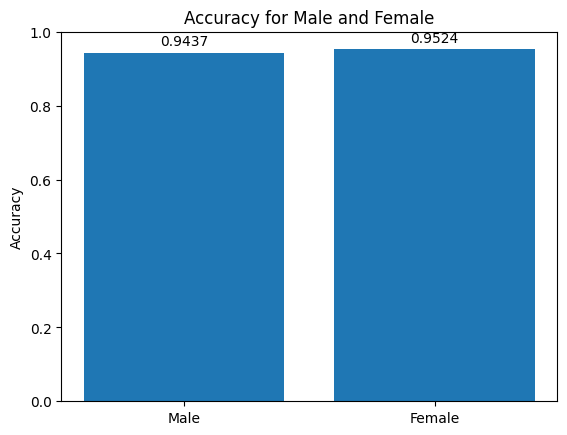

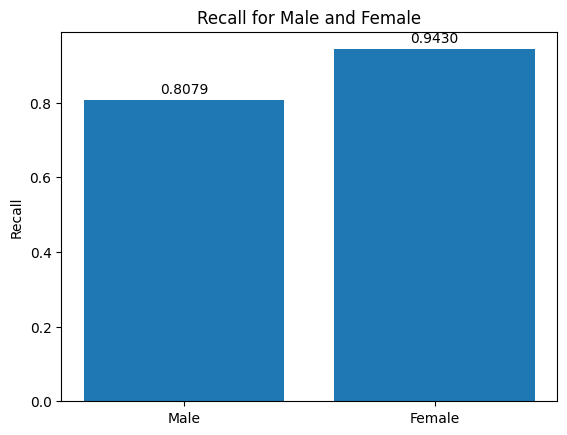

: 

: 

: 

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score
import matplotlib.pyplot as plt

# Divide the data by gender using the one-hot encoded column 'Gender_Male'
male_idx = X_test['Gender_Male'] == True
female_idx = X_test['Gender_Male'] == False

male_y_pred = y_pred[male_idx]
female_y_pred = y_pred[female_idx]

male_y_test = y_test[male_idx]
female_y_test = y_test[female_idx]

# Calculate accuracy
male_accuracy = accuracy_score(male_y_test, male_y_pred)
female_accuracy = accuracy_score(female_y_test, female_y_pred)

# Calculate the accuracy difference between groups
accuracy_diff = abs(male_accuracy - female_accuracy)

print(f"Male accuracy: {male_accuracy:.4f}")
print(f"Female accuracy: {female_accuracy:.4f}")
print(f"Accuracy difference between Male and Female: {accuracy_diff:.4f}")

# Calculate recall
male_recall = recall_score(male_y_test, male_y_pred, average='macro', zero_division=0)
female_recall = recall_score(female_y_test, female_y_pred, average='macro', zero_division=0)

# Calculate the recall difference between groups
recall_diff = abs(male_recall - female_recall)

print(f"Male recall: {male_recall:.4f}")
print(f"Female recall: {female_recall:.4f}")
print(f"Recall difference between Male and Female: {recall_diff:.4f}")

# Display a bar chart for accuracy differences

plt.bar(['Male', 'Female'], [male_accuracy, female_accuracy])

for i, v in enumerate([male_accuracy, female_accuracy]):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')

plt.title('Accuracy for Male and Female')
plt.ylabel('Accuracy')
plt.show()

# Display a bar chart for recall differences

plt.bar(['Male', 'Female'], [male_recall, female_recall])
for i, v in enumerate([male_recall, female_recall]):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')

plt.title('Recall for Male and Female')
plt.ylabel('Recall')
plt.show()

The accuracy is similar between males (94.37%) and females (95.24%), suggesting the model is fair in terms of overall accuracy.

The recall shows a bigger difference: males have a recall of 80.79%, while females have a higher recall of 94.30%.
This means the model is better at identifying obesity for females than for males.

---
## 📝 Feedback
We are interested in your feedback in order to improve this course. We will read all of your feedback and evaluate it. What you share may have a direct impact on the rest of the course or future iterations of it.

Write down your feedback on the lecture, the exercises, or the assignments in the Markdown cell below. Furthermore, please note the approximate time it took you to complete the assignment. You may also write about your insights, what you found interesting, or questions that you have.

In [ ]:
import joblib

# Save the model
joblib.dump(model, 'random_forest_model.pkl')
print("Model saved as random_forest_model.pkl")

Model saved as random_forest_model.pkl


: 

: 

: 